1인당_연간_양곡소비량
=================

* 데이터 분석

> 1. index 4번째는 농가 + 비농가 col 추가
>
> 2. 농가/합계, 비농가/합계 비율을 각각 col 추가
>
> 3. 농가, 비농가 각 년도 별 차이 구하기
>
> 4. 농가, 비농가 쌀 소비량 회귀선 구하기
>
> 5. 농가와 비농가 쌀 소비량이 같아지는 추세


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

np.set_printoptions(precision=3, suppress=True)

data_file = '1인당_연간_양곡소비량_20230324202555.csv'
np_data = pd.read_csv(data_file, encoding = 'cp949').to_numpy()
np_data = np_data[1:, 1:].astype(np.float64)
print(np_data, np_data.shape)

[[2011.    69.8  107.7   67.2]
 [2012.    68.6  105.4   66.2]
 [2013.    66.   101.6   63.1]
 [2014.    64.    99.    61.2]
 [2015.    61.9   96.3   59.4]
 [2016.    61.    94.7   59. ]
 [2017.    61.1   92.3   59.3]
 [2018.    60.5   91.7   58.8]
 [2019.    58.6   90.3   56.9]
 [2020.    57.1   88.8   55.5]
 [2021.    56.5   87.4   54.9]
 [2022.    56.5   87.4   54.9]] (12, 4)


In [125]:
New_col = (np_data[:,2] + np_data[:, 3]).reshape(12,1)
# 또는 New_col = New_col[:, np.newaxis]

In [126]:
#np.concartenate
#__[:, np.newaxis]
# ndarray[np.newaxis, :]
# .expand_dims()
new_data = np.concatenate((np_data, New_col), axis = 1)
print(new_data)

[[2011.    69.8  107.7   67.2  174.9]
 [2012.    68.6  105.4   66.2  171.6]
 [2013.    66.   101.6   63.1  164.7]
 [2014.    64.    99.    61.2  160.2]
 [2015.    61.9   96.3   59.4  155.7]
 [2016.    61.    94.7   59.   153.7]
 [2017.    61.1   92.3   59.3  151.6]
 [2018.    60.5   91.7   58.8  150.5]
 [2019.    58.6   90.3   56.9  147.2]
 [2020.    57.1   88.8   55.5  144.3]
 [2021.    56.5   87.4   54.9  142.3]
 [2022.    56.5   87.4   54.9  142.3]]


In [127]:
new_col_a = (new_data[:, 2]/new_data[:, 4]).reshape(12,1)
new_col_b = (new_data[:, 3]/new_data[:, 4]).reshape(12,1)


#print(new_col_a, new_col_b)

final_data = np.concatenate((new_data, new_col_a, new_col_b), axis = 1)

print(final_data)

[[2011.      69.8    107.7     67.2    174.9      0.616    0.384]
 [2012.      68.6    105.4     66.2    171.6      0.614    0.386]
 [2013.      66.     101.6     63.1    164.7      0.617    0.383]
 [2014.      64.      99.      61.2    160.2      0.618    0.382]
 [2015.      61.9     96.3     59.4    155.7      0.618    0.382]
 [2016.      61.      94.7     59.     153.7      0.616    0.384]
 [2017.      61.1     92.3     59.3    151.6      0.609    0.391]
 [2018.      60.5     91.7     58.8    150.5      0.609    0.391]
 [2019.      58.6     90.3     56.9    147.2      0.613    0.387]
 [2020.      57.1     88.8     55.5    144.3      0.615    0.385]
 [2021.      56.5     87.4     54.9    142.3      0.614    0.386]
 [2022.      56.5     87.4     54.9    142.3      0.614    0.386]]


In [128]:
# np.diff()함수 사용해 보기
a1 = np.array([2,5,3,8,7])
np.diff(a1)

array([ 3, -2,  5, -1])

In [129]:
# 농가, 비농가 각 년도 별 차이 구하기
np.diff(final_data, axis = 0)

array([[ 1.   , -1.2  , -2.3  , -1.   , -3.3  , -0.002,  0.002],
       [ 1.   , -2.6  , -3.8  , -3.1  , -6.9  ,  0.003, -0.003],
       [ 1.   , -2.   , -2.6  , -1.9  , -4.5  ,  0.001, -0.001],
       [ 1.   , -2.1  , -2.7  , -1.8  , -4.5  ,  0.001, -0.001],
       [ 1.   , -0.9  , -1.6  , -0.4  , -2.   , -0.002,  0.002],
       [ 1.   ,  0.1  , -2.4  ,  0.3  , -2.1  , -0.007,  0.007],
       [ 1.   , -0.6  , -0.6  , -0.5  , -1.1  ,  0.   , -0.   ],
       [ 1.   , -1.9  , -1.4  , -1.9  , -3.3  ,  0.004, -0.004],
       [ 1.   , -1.5  , -1.5  , -1.4  , -2.9  ,  0.002, -0.002],
       [ 1.   , -0.6  , -1.4  , -0.6  , -2.   , -0.001,  0.001],
       [ 1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

[[2011.    69.8  107.7   67.2]
 [2012.    68.6  105.4   66.2]
 [2013.    66.   101.6   63.1]
 [2014.    64.    99.    61.2]
 [2015.    61.9   96.3   59.4]
 [2016.    61.    94.7   59. ]
 [2017.    61.1   92.3   59.3]
 [2018.    60.5   91.7   58.8]
 [2019.    58.6   90.3   56.9]
 [2020.    57.1   88.8   55.5]
 [2021.    56.5   87.4   54.9]
 [2022.    56.5   87.4   54.9]]


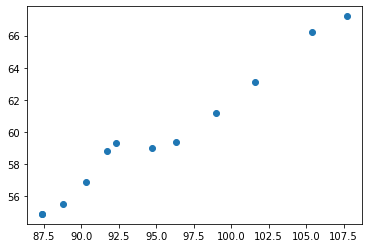

In [130]:
print(np_data)
_, axe = plt.subplots()
axe.scatter(np_data[: ,2], np_data[:, 3]) # 농가 쌀 소비량 x축, 비농가 쌀 소비량 y축 


0.9855025014693379


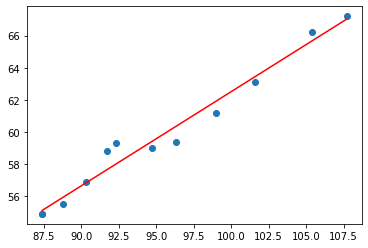

In [131]:
# 상관도, 회귀선
mean_x = np.mean(np_data[:, 2])
mean_y = np.mean(np_data[:, 3])
std_x = np.std(np_data[:, 2])
std_y = np.std(np_data[:, 3])
xy_corr = np.corrcoef(np_data[:, 2], np_data[:, 3])[0, 1]
print(xy_corr)


slope = xy_corr * (std_y/std_x)
intercept = mean_y - (slope * mean_x)

y_pred = np_data[:, 2]*slope + intercept

_, axe = plt.subplots()
axe.plot(np_data[:, 2], y_pred, c='r')
axe.scatter(np_data[:, 2], np_data[:, 3])

-0.9760591450063468


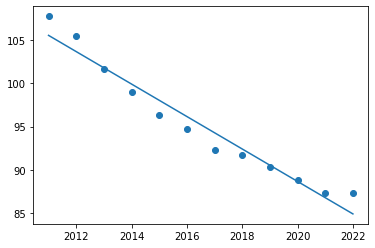

In [132]:
x = np.arange(2011, 2023)
y = np_data[:, 2] # 농가

mean_x = np.mean(x)
mean_y = np.mean(y)
std_x = np.std(x)
std_y = np.std(y)
xy_corr = np.corrcoef(x, y)[0, 1]
print(xy_corr)


slope = xy_corr * (std_y/std_x)
intercept = mean_y - (slope * mean_x)

farm_slope = slope
farm_intercept = intercept

y_pred = x*slope + intercept

_, axe = plt.subplots()
axe.scatter(x, y)
axe.plot(x, y_pred)

-0.9617129201426006


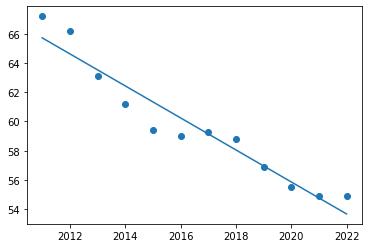

In [134]:
x = np.arange(2011, 2023)
y = np_data[:, 3] # 비농가

mean_x = np.mean(x)
mean_y = np.mean(y)
std_x = np.std(x)
std_y = np.std(y)
xy_corr = np.corrcoef(x, y)[0, 1]
print(xy_corr)


slope = xy_corr * (std_y/std_x)
intercept = mean_y - (slope * mean_x)

city_slope = slope
city_intercept = intercept


y_pred = x*slope + intercept

_, axe = plt.subplots()
axe.scatter(x, y)
axe.plot(x, y_pred)

In [123]:
print(farm_slope, city_slope)

-1.8692307692307686 -1.0951048951048954


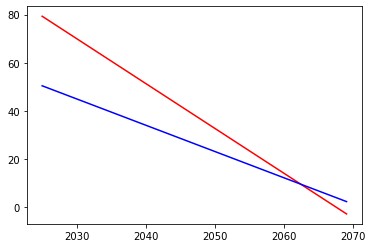

In [136]:
# 농가와 비농가 쌀 소비량이 같아지는 추세

x = np.arange(2025, 2070)
_,axe = plt.subplots()

axe.plot(x, x*farm_slope+farm_intercept, c = 'r')
axe.plot(x, x*city_slope+city_intercept, c = 'b')